## Book 4_CV_Modelling

*Note: I was unable to upload all of the datasets that I have used in these notebooks onto github because of how big the size of the file was. But if you have any questions feel free to reach out to me thank you :)*

This book focuses on the modelling techniques for count vectorizer. 
The modelling techniques are listed below:
    
    1.1: Naive Bayes
        1.1.1: Bernoulli Naive Bayes
        1.1.2: Multinomial Naive Bayes
        1.1.3: Gaussian Naive Bayes
        1.1.4: Hyperparameter Tuning (Bernoulli NB)
        1.1.5: Hyperparameter Tuning (Gaussian NB)
    1.2: Logistic Regression
    1.3: Adaboost
    1.4: KNN (K-Nearest-Neighbor)
    1.5: SVM Classifier
    1.6: Optimise and Model Evaluation 


In [1]:
import pandas as pd
import numpy as np

# for modelling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

# for Model Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from time import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from time import time
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Importing CV
X_counts_df = pd.read_csv('../data/X_counts_df.csv')

In [3]:
# Importing 
suicide_merged = pd.read_csv('../data/suicide_merged.csv')

In [4]:
di = {'suicide': 1, 'non-suicide' : 0}
suicide_merged['class'] = suicide_merged['class'].map(di)

In [5]:
suicide_merged.shape

(4000, 15)

In [6]:
suicide_merged['class'].value_counts()

0    2000
1    2000
Name: class, dtype: int64

In [7]:
# assigning X and y 
X = X_counts_df
y = suicide_merged['class']

In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [9]:
y.tail()

3995    1
3996    1
3997    1
3998    1
3999    1
Name: class, dtype: int64

#### Train, Test, Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [11]:
# Baseline score

In [12]:
ss= StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

### 1.1: Naive Bayes

#### 1.1.1: Bernoulli Naive Bayes

In [13]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

# Cross-Validation
print(cross_val_score(BernNB, X_train, y_train, cv = 5).mean())

# Accuracy score of train
print(BernNB.score(X_train, y_train))

# Accuracy score of test
print(BernNB.score(X_test, y_test))

# Accuracy for y_expect and y_pred
print(accuracy_score(y_expect, y_pred))

BernoulliNB(binarize=True)
0.799
0.9403333333333334
0.808
0.808


 #### 1.1.2: Multinomial Naive Bayes

In [14]:
#MultiNB = MultinomialNB()
#MultiNB.fit(X_train, y_train)
#print(MultiNB)

#y_pred = MultiNB.predict(X_test)

# Cross-Validation
#print(cross_val_score(MultiNB, X_train, y_train, cv = 5).mean())

# Accuracy score of train
#print(MultiNB.score(X_train, y_train))

# Accuracy score of test
#print(MultiNB.score(X_test, y_test))

# Accuracy for y_test and y_pred
#print(accuracy_score(y_test, y_pred))

#### 1.1.3: Gaussian Naive Bayes

In [15]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)

y_pred = GausNB.predict(X_test)

# Cross-Validation
print(cross_val_score(GausNB, X_train, y_train, cv = 5).mean())

# Accuracy score of train
print(GausNB.score(X_train, y_train))

# Accuracy score of test
print(GausNB.score(X_test, y_test))

# Accuracy for y_test and y_pred
print(accuracy_score(y_test, y_pred))

GaussianNB()
0.5603333333333333
0.8776666666666667
0.527
0.527


#### 1.1.4: Optimisation of Bernoulli Naive Bayes

In [16]:
BernNB = BernoulliNB(binarize = 0.1)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test

# Predicting Y = subreddit 
y_pred = BernNB.predict(X_test)

# Cross-Validation
print(cross_val_score(BernNB, X_train, y_train, cv = 5).mean())

# Accuracy score of train
print(BernNB.score(X_train, y_train))

# Accuracy score of test
print(BernNB.score(X_test, y_test))

# Accuracy for y_expect and y_pred
print(accuracy_score(y_expect, y_pred))

BernoulliNB(binarize=0.1)
0.7203333333333333
0.896
0.741
0.741


In [17]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

BernoulliNB(binarize=True)


#### Initial Evaluation (BernoulliNB)

In [18]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79       498
           1       0.76      0.90      0.83       502

    accuracy                           0.81      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.82      0.81      0.81      1000



In [19]:
# Current score without tuning
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

# scores
accuracy_score = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score = recall_score(y_test, y_pred)
specificity_score = tn / (tn + fp)

print('accuracy score: ' + str(accuracy_score))
print('precision score: ' + str(precision_score))
print('recall score: ' + str(recall_score))
print('specificity score: ' + str(specificity_score))

accuracy score: 0.808
precision score: 0.7591973244147158
recall score: 0.9043824701195219
specificity score: 0.7108433734939759


#### 1.1.4: Hyperparameter Tuning (Bernoulli NB)

In [20]:
# getting the parasms
BernoulliNB().get_params(deep=True)

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [21]:
# Tuning for BernoulliNB 
bnb = Pipeline([
    ('ss', StandardScaler()),
    ('bnb', BernoulliNB())
])

pipe_params = {
    'bnb__alpha': [0.5, 1, 1.5],
}

gs_bnb = GridSearchCV(bnb, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.
t0 = time()
gs_bnb.fit(X_train, y_train)
bnb_test_time = time() - t0
print('Best bnb Parameters:', gs_bnb.best_estimator_)
print('Fit time:  %0.3fs' % bnb_test_time);

Best bnb Parameters: Pipeline(steps=[('ss', StandardScaler()), ('bnb', BernoulliNB(alpha=1.5))])
Fit time:  33.475s


#### 1.1.5: Hyperparameter Tuning (Gaussian NB)

In [22]:
GaussianNB().get_params(deep=True)

{'priors': None, 'var_smoothing': 1e-09}

In [23]:
# Tuning for GaussianNB 
gnb = Pipeline([
    ('ss', StandardScaler()),
    ('gnb', GaussianNB() )
])

pipe_params = {
    'gnb__var_smoothing': np.logspace(0,-9, num=100),
}

gs_gnb = GridSearchCV(gnb, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.
t0 = time()
gs_gnb.fit(X_train, y_train)
gnb_test_time = time() - t0
print('Best gnb Parameters:', gs_gnb.best_estimator_)
print('Fit time:  %0.3fs' % gnb_test_time);

Best gnb Parameters: Pipeline(steps=[('ss', StandardScaler()),
                ('gnb', GaussianNB(var_smoothing=0.23101297000831597))])
Fit time:  1236.467s


#### Optimise and Evaluate Model

In [24]:
# (BernoulliNB) Optimise and evaluate Model
gs_bnb.fit(X_train, y_train)
print(" Optimised bnb ".center(42, "="))
print('Accuracy score for Train data set:', round(gs_bnb.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(gs_bnb.score(X_test, y_test),4))
preds = gs_bnb.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('Specificity:', round(tn / (tn + fp),4))
print('Sensitivity:', round(tp / (tp + fn),4))
print('Specificity-Sensitivity Balance:', round((1-(tn / (tn + fp))+(tp / (tp + fn))),4))
print(f'Fit Time:', round((bnb_test_time),4))

============= Optimised bnb ==============
Accuracy score for Train data set: 0.8823
Accuracy score for Test data set: 0.746
Specificity: 0.6928
Sensitivity: 0.7988
Specificity-Sensitivity Balance: 1.106
Fit Time: 33.4748


In [25]:
# (GaussianNB) Optimise and evaluate Model
gs_gnb.fit(X_train, y_train)
print(" Optimised gnb ".center(42, "="))
print('Accuracy score for Train data set:', round(gs_gnb.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(gs_gnb.score(X_test, y_test),4))
preds = gs_gnb.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('Specificity:', round(tn / (tn + fp),4))
print('Sensitivity:', round(tp / (tp + fn),4))
print('Specificity-Sensitivity Balance:', round((1-(tn / (tn + fp))+(tp / (tp + fn))),4))
print(f'Fit Time:', round((gnb_test_time),4))

============= Optimised gnb ==============
Accuracy score for Train data set: 0.8733
Accuracy score for Test data set: 0.522
Specificity: 0.2691
Sensitivity: 0.7729
Specificity-Sensitivity Balance: 1.5038
Fit Time: 1236.4673


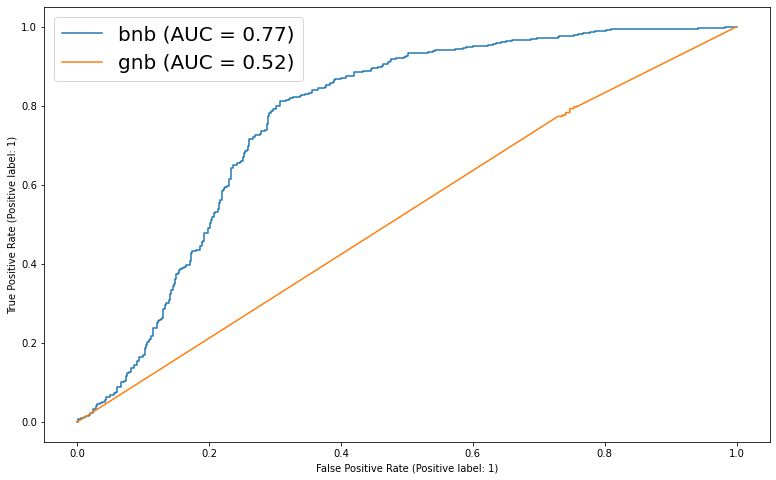

In [40]:
fig, ax = plt.subplots(figsize=(13, 8))
bnb_disp = plot_roc_curve(gs_bnb, X_test, y_test, name = 'bnb', ax = ax)
# mnb_disp = plot_roc_curve(gs_mnb, X_test, y_test, name = 'mnb', ax = bnb_disp.ax_)
gnb_disp = plot_roc_curve(gs_gnb, X_test, y_test, name = 'gnb', ax = bnb_disp.ax_)
plt.legend(prop={"size":20});
plt.savefig("../graph/naivebayes_auc_cv.jpg", bbox_inches = 'tight')

### 1.2: Logistic Regression

In [27]:
# Instantiate logistic regression model
lr = LogisticRegression(solver = 'lbfgs', max_iter = 5000)

# Scale
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Fit model to training data
lr.fit(X_train, y_train)

# Evaluate model on training data
print('Accuracy score for Train data set:',lr.score(X_train, y_train))

# Evaluate model on testing data
print('Accuracy score for Test data set:', lr.score(X_test, y_test))

preds = lr.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()


print('Specificity:', round(tn / (tn + fp),4))
print('Sensitivity:', round(tp / (tp + fn),4))

Accuracy score for Train data set: 0.9996666666666667
Accuracy score for Test data set: 0.719
Specificity: 0.7229
Sensitivity: 0.7151


In [28]:
lr_hyper = Pipeline([
    ('ss', StandardScaler()),
    ('lr_hyper', LogisticRegression())
])

pipe_params = {
    'lr_hyper__C': [100, 10, 1.0, 0.1, 0.01],
    'lr_hyper__intercept_scaling': [1, 1.5, 2],
    'lr_hyper__max_iter': [100, 500, 1000]
}

gs_lr_hyper = GridSearchCV(lr_hyper, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

t0 = time()
gs_lr_hyper.fit(X_train, y_train)
lr_hyper_test_time = time() - t0
print('Best LR Parameters:', gs_lr_hyper.best_estimator_)
print('Fit time:  %0.3fs' % lr_hyper_test_time);

Best LR Parameters: Pipeline(steps=[('ss', StandardScaler()), ('lr_hyper', LogisticRegression())])
Fit time:  3181.439s


### 1.3: Adaboost

In [29]:
# Setting pipeline for two stages
ada = Pipeline([
    ('ss', StandardScaler()),
    ('ada', AdaBoostClassifier())])

pipe_params = {
    'ada__n_estimators': [50,100],
    'ada__learning_rate': [0.9, 1]
}

gs_ada = GridSearchCV(ada, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.
t0 = time()
gs_ada.fit(X_train, y_train)
ada_test_time = time() - t0
print('Best ADABoost Parameters:', gs_ada.best_estimator_)
print('Fit time:  %0.3fs' % ada_test_time);

Best ADABoost Parameters: Pipeline(steps=[('ss', StandardScaler()),
                ('ada', AdaBoostClassifier(learning_rate=0.9))])
Fit time:  1219.532s


### 1.4: KNN (K-Nearest-Neighbor)

In [30]:
knn = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

pipe_params = {
    'knn__n_neighbors': [10,15],
    'knn__p': [1,2]
}

gs_knn = GridSearchCV(knn, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

t0 = time()
gs_knn.fit(X_train, y_train)
knn_test_time = time() - t0
print('Best KNN Parameters:', gs_knn.best_estimator_)
print('Fit time:  %0.3fs' % knn_test_time);

Best KNN Parameters: Pipeline(steps=[('ss', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10, p=1))])
Fit time:  673.912s


### 1.5: SVM Classifier

In [31]:
svc = Pipeline([
    ('ss', StandardScaler()),
    ('svc', SVC())
])

pipe_params = {
    'svc__kernel': ['rbf'],
    'svc__gamma': ['scale'],
    'svc__C': [0.1, 1.0, 10.0],
    'svc__max_iter': [100, 500, 1000]
}

gs_svc = GridSearchCV(svc, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

t0 = time()
gs_svc.fit(X_train, y_train)
svc_test_time = time() - t0
print('Best SVC Parameters:', gs_svc.best_estimator_)
print('Fit time:  %0.3fs' % svc_test_time);

Best SVC Parameters: Pipeline(steps=[('ss', StandardScaler()), ('svc', SVC(C=10.0, max_iter=500))])
Fit time:  2917.770s


### 1.6 Optimise and Model Evaluation

In [32]:
# Optimise LR and evaluate Model
gs_lr_hyper.fit(X_train, y_train)
print(" Optimised LR ".center(42, "="))
print('Accuracy score for Train data set:', round(gs_lr_hyper.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(gs_lr_hyper.score(X_test, y_test),4))
preds = gs_lr_hyper.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('Specificity:', round(tn / (tn + fp),4))
print('Sensitivity:', round(tp / (tp + fn),4))
print('Specificity-Sensitivity Balance:', round((1-(tn / (tn + fp))+(tp / (tp + fn))),4))
print(f'Fit Time:', round((lr_hyper_test_time),4))

============== Optimised LR ==============
Accuracy score for Train data set: 0.9997
Accuracy score for Test data set: 0.719
Specificity: 0.7229
Sensitivity: 0.7151
Specificity-Sensitivity Balance: 0.9922
Fit Time: 3181.4386


In [33]:
# Optimise ADABoost and evaluate Model
gs_ada.fit(X_train, y_train)
print(" Optimised ADABoost ".center(42, "="))
print('Accuracy score for Train data set:', round(gs_ada.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(gs_ada.score(X_test, y_test),4))
preds = gs_ada.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('Specificity:', round(tn / (tn + fp),4))
print('Sensitivity:', round(tp / (tp + fn),4))
print('Specificity-Sensitivity Balance:', round((1-(tn / (tn + fp))+(tp / (tp + fn))),4))
print(f'Fit Time:', round((ada_test_time),4))

=========== Optimised ADABoost ===========
Accuracy score for Train data set: 1.0
Accuracy score for Test data set: 0.999
Specificity: 1.0
Sensitivity: 0.998
Specificity-Sensitivity Balance: 0.998
Fit Time: 1219.5323


In [34]:
# Optimise KNN and evaluate Model
gs_knn.fit(X_train, y_train)
print(" Optimised KNN ".center(42, "="))
print('Accuracy score for Train data set:', round(gs_knn.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(gs_knn.score(X_test, y_test),4))
preds = gs_knn.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('Specificity:', round(tn / (tn + fp),4))
print('Sensitivity:', round(tp / (tp + fn),4))
print('Specificity-Sensitivity Balance:', round((1-(tn / (tn + fp))+(tp / (tp + fn))),4))
print(f'Fit Time:', round((knn_test_time),4))

============= Optimised KNN ==============
Accuracy score for Train data set: 0.7407
Accuracy score for Test data set: 0.7
Specificity: 0.8092
Sensitivity: 0.5916
Specificity-Sensitivity Balance: 0.7824
Fit Time: 673.912


In [35]:
# Optimise SVM and evaluate Model
gs_svc.fit(X_train, y_train)
print(" Optimised SVM ".center(42, "="))
print('Accuracy score for Train data set:', round(gs_svc.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(gs_svc.score(X_test, y_test),4))
preds = gs_svc.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('Specificity:', round(tn / (tn + fp),4))
print('Sensitivity:', round(tp / (tp + fn),4))
print('Specificity-Sensitivity Balance:', round((1+(tn / (tn + fp))-(tp / (tp + fn))),4))
print(f'Fit Time:', round((svc_test_time),4))

============= Optimised SVM ==============
Accuracy score for Train data set: 0.881
Accuracy score for Test data set: 0.683
Specificity: 0.7129
Sensitivity: 0.6534
Specificity-Sensitivity Balance: 1.0595
Fit Time: 2917.7699


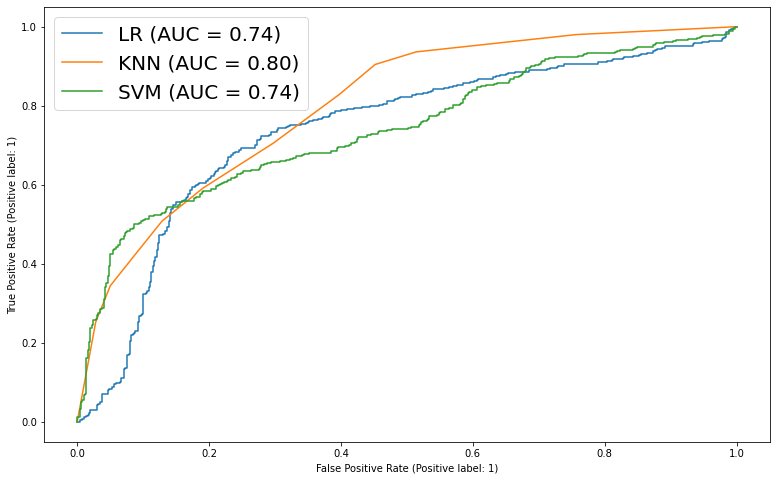

In [39]:
# Plotting
fig, ax = plt.subplots(figsize=(13, 8))
lr_hyper_disp = plot_roc_curve(gs_lr_hyper, X_test, y_test, name = 'LR', ax = ax)
knn_disp = plot_roc_curve(gs_knn, X_test, y_test, name = 'KNN', ax = lr_hyper_disp.ax_)
svm_disp = plot_roc_curve(gs_svc, X_test, y_test, name = 'SVM', ax = lr_hyper_disp.ax_)
plt.legend(prop={"size":20});
plt.savefig("../graph/optimised_models_auc_cv.jpg", bbox_inches = 'tight')